# This is week 06 activities.
---
## Goal
In this in-class quiz, you will learn:  

* Support Vector Machine 

* Decision Tree Classifier

* Artificial Neural Network

and how to apply these method on a binary classification problem.

## Introduction 

* We will take the spectrum energy density data from "Spitzer From Molecular Cores to Planet-Forming Disks (C2D)" project for the classification task.

* The spectrum energy data contains three Spitzer instruments (IRAC, MIPS, and IRS).

* We will use scikit-learn packages: SVC, DecisionTreeClassifier, MLPClassifier for classification problem.

* All training data and testing data are prepared in data input.
---
* Data format:
  * x_data : 0~7, spectrum energy distribution (SED) for J, H, K, IRAC1, IRAC2, IRAC3, IRAC4, MIPS1.
  * y_data : one-hot labels (0: star, 1: young stellar object).

## References 
* REF: [Spitzer From Molecular Cores to Planet-Forming Disks (C2D) info](https://irsa.ipac.caltech.edu/data/SPITZER/C2D/index.html)
* REF: [Understanding Decision Tree](https://towardsdatascience.com/understanding-decision-trees-once-and-for-all-2d891b1be579)
* REF: [sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
* REF: [Artificial Neuron Network](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import pickle
from sklearn.svm import SVC
from sklearn import tree
from sklearn.neural_network import MLPClassifier
 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/phys591000-week06/yso_lab.pickle
/kaggle/input/phys591000-week06/SED_IRAC4.pickle
/kaggle/input/phys591000-week06/SED_c2d_data.pickle


# Load data
*  ---- Data Format ----


    * x_data:
        * Example: spectrum energy distribution (SED) for IRAC1, IRAC2, IRAC3, IRAC4.
        * Practice: spectrum energy distribution (SED) for J, H, K, IRAC1, IRAC2, IRAC3, IRAC4, MIPS1.
    * y_data:
        * Example & Practice: one-hot labels (0: star, 1: young stellar object).


* To load a pickle file, you can easily use 'pickle.load' ("rb" means "read binary file") :
      with open('filename.pickle','rb') as f:
          data = pickle.load()


* You will get a dictionary from the pickle file. You can check the data type by:
      type(data)


* In a python dictionary, there are "keys" and "values". Print all "keys" in the data dictionary by:
      data.keys()


* All data you need is inside the "values" in dictionary. Save them with "x_train", "y_train", "x_test", "y_test".


* Check the shape of "x_train", "x_test", "y_train", "y_test".

In [2]:
"""
Example 1.1
"""

with open('/kaggle/input/phys591000-week06/SED_IRAC4.pickle','rb') as f:
    data = pickle.load(f)

print(type(data))
print(data.keys())

x_train_ex, y_train_ex = data['x_train'], data['y_train']
x_test_ex, y_test_ex = data['x_test'], data['y_test']

print('x_train shape: ', x_train_ex.shape)
print('x_test shape:  ', x_test_ex.shape)
print('y_train shape: ', y_train_ex.shape)
print('y_test shape:  ', y_test_ex.shape)

<class 'dict'>
dict_keys(['x_train', 'y_train', 'x_test', 'y_test'])
x_train shape:  (1229, 4)
x_test shape:   (308, 4)
y_train shape:  (1229, 2)
y_test shape:   (308, 2)


## Exercise 1

* Please load the data in 'SED_c2d_data.pickle' and save the corresponding data into "x_train", "y_train", "x_test", "y_test".
* Find out x_train's and  shape



In [3]:
'''
Exercise 1
'''
############################################################################################################################
# Your code in this section:

with open("/kaggle/input/phys591000-week06/SED_c2d_data.pickle", 'rb') as f:
    data = pickle.load(f)

print(type(data))
print(data.keys())

x_train, y_train = data["x_train"], data["y_train"]
x_test, y_test = data["x_test"], data["y_test"]

print('x_train shape: ', x_train.shape)
print('x_test shape:  ', x_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape:  ', y_test.shape)







############################################################################################################################

# Check your result is correct or not.
assert x_train.shape == (1229,8), print(f"Wrong Array: 'x_train'")
assert x_test.shape == (308,8), print(f"Wrong Array: 'x_test'")
assert y_train.shape == (1229,2), print(f"Wrong Array: 'y_train'")
assert y_test.shape == (308,2),print(f"Wrong Array: 'y_test'")
print("passed!")

<class 'dict'>
dict_keys(['x_train', 'y_train', 'x_test', 'y_test'])
x_train shape:  (1229, 8)
x_test shape:   (308, 8)
y_train shape:  (1229, 2)
y_test shape:   (308, 2)
passed!


# Support Vector Machine

* We use the support vector classifier (SVC) in the scikit-learn's svm package by:
      from sklearn.svm import SVC


* You can call a classifier with 
      SVC() 


* There're some additional parameter can be setting:
     * kernal: Type of the kernal function.
     * C: The coefficient of penalty. It shows the toleratance of wrong answer of the model. The default value is 1.


* More details setting at:  [sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)


* SVC can be training with:
      model.fit(x_train, y_train)
     * x_train is a 2-D array training data, each column corresponding to different feature.
     * y_train is a 1-D array for the data's label.


* In today's dataset, each data was labeled by a one-hot representation, so you need to change 'y_train', 'y_test'  into a 1-D array before training.


* You can simply evaluate your model by:
      model.score()


* Print the score of training and testing.

In [4]:
'''
Example 2
'''

print(x_train_ex.shape)
# ----- Turn one-hot representation into 1-D array(or list) -----
# you can print(y_train) to find out the one-hot representation

y_train_flat_ex = []
for row in y_train_ex:
    y_train_flat_ex.append(np.argmax(row))

y_test_flat_ex = []
for row in y_test_ex:
    y_test_flat_ex.append(np.argmax(row))

# ----- Setup model and train -----
model_svm = SVC(kernel='linear', C=1)
model_svm.fit(x_train_ex,y_train_flat_ex)

# ----- Evaluate model -----
print('Training Score: ',model_svm.score(x_train_ex, y_train_flat_ex))
print('Testing Score: ', model_svm.score(x_test_ex, y_test_flat_ex))

(1229, 4)
Training Score:  0.9430431244914564
Testing Score:  0.9383116883116883


## Exercise 2
* Turn 'y_train' and 'y_test' to 1-D label.
* Use support vector classifier to train your model.
* Evaluate your model and print the training score and testing score.

In [5]:
'''
Exercise 2
'''
############################################################################################################################
# Your code in this section:

print(x_train.shape)
print(y_train.shape)

y_train_flat = []
for row in y_train:
    y_train_flat.append(np.argmax(row))
    
print(len(y_train_flat))

y_test_flat = []
for row in y_test:
    y_test_flat.append(np.argmax(row))

#setup model & train

model_svm = SVC(kernel="linear", C=1)
model_svm.fit(x_train, y_train_flat)

print('Training Score: ',model_svm.score(x_train, y_train_flat))
print('Testing Score: ', model_svm.score(x_test, y_test_flat))




############################################################################################################################

(1229, 8)
(1229, 2)
1229
Training Score:  0.9967453213995118
Testing Score:  0.9935064935064936


# Decision tree

* We use the decision tree classifier in scikit-learn's package:
      from sklearn import tree


* You can call a simple decision tree with 
      tree.DecisionTreeClassifier()


* Decision tree classifier can be trained with:
      model.fit(x_train, y_train)
     * x_train is a 2-D array training data, each column corresponding to different feature.
     * y_train is a 1-D array for the data's label.


* Remember that you need to feed in 1-D array as a label.


* As a "tree🌲", you can graph the structure by:
      tree.plot_tree(model)
     * You can add additional parameter such as feature_names, class_names in 'tree.plot_tree()'


* You can simply evaluate your model by:
      model.score()


* Print the score of training and testing.
* Reference:  [DecisionTree](https://scikit-learn.org/stable/modules/tree.html)

Training Score:  0.9861676159479251
Testing Score:  0.9448051948051948


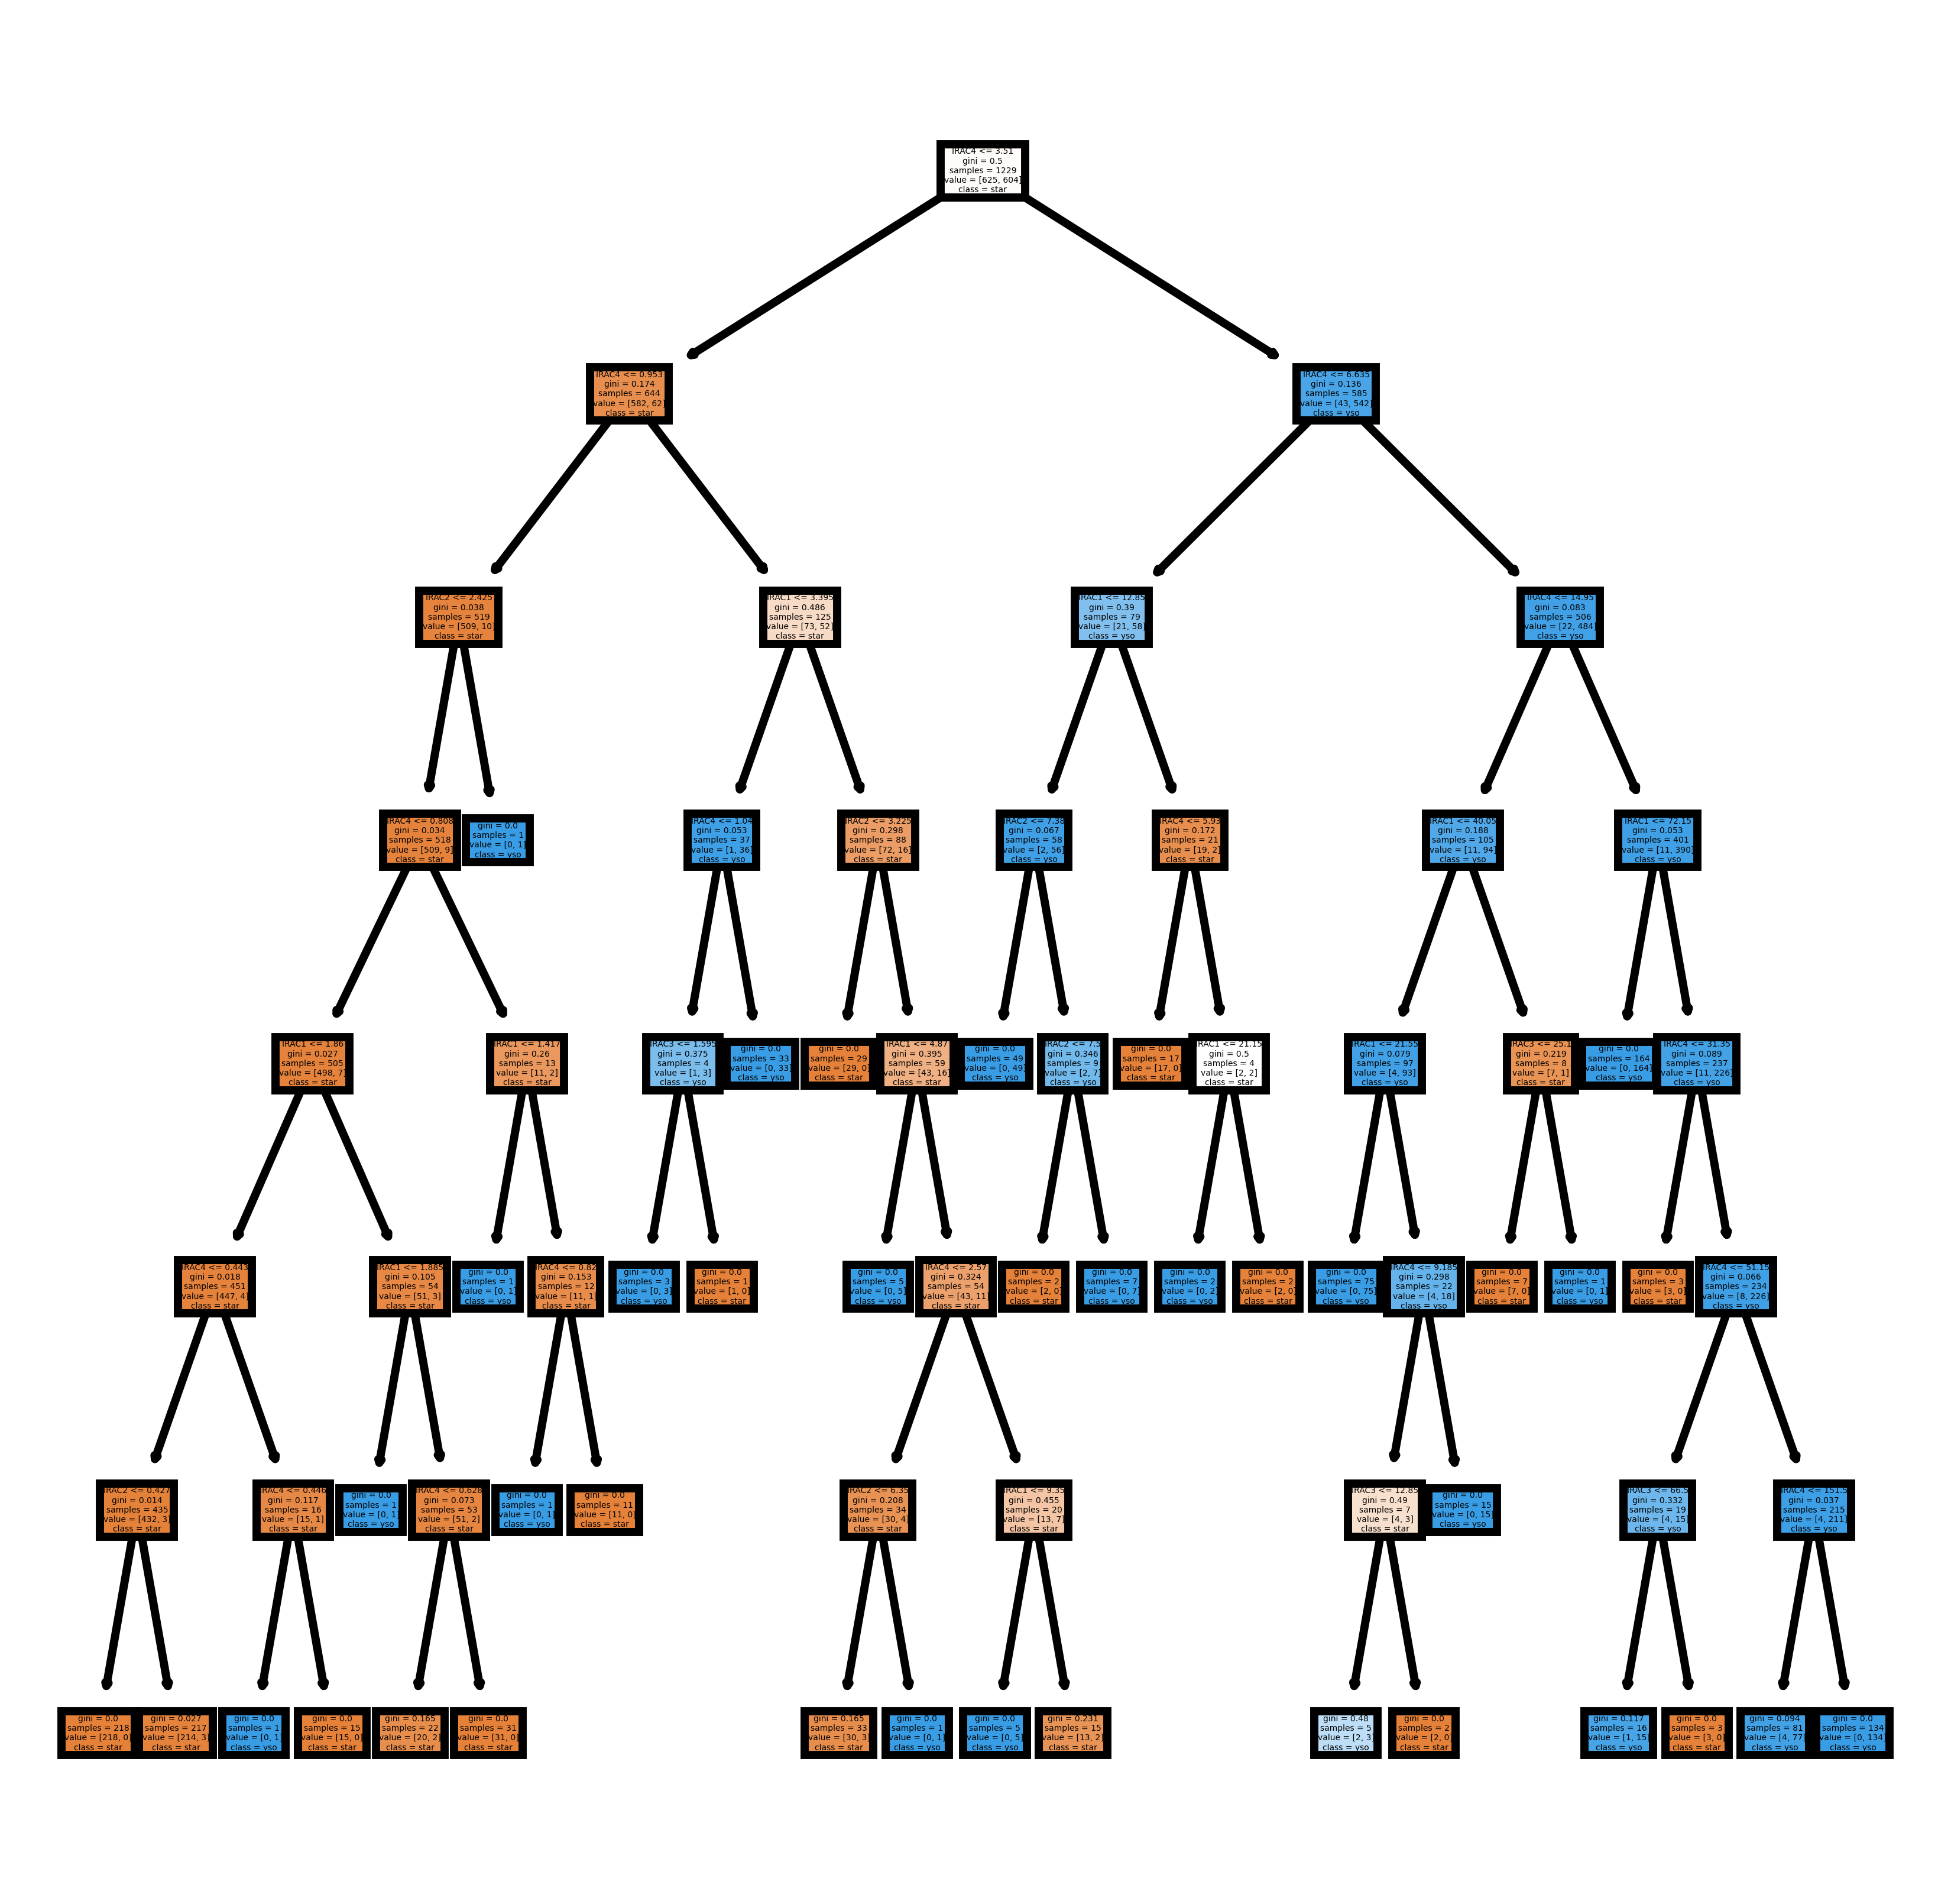

In [6]:
'''
Example 3
'''
# Set desicion tree
tree_model = tree.DecisionTreeClassifier(max_depth = 7)
tree_model.fit(x_train_ex, y_train_flat_ex)

feature_name = ['IRAC1', 'IRAC2', 'IRAC3', 'IRAC4']
classes = ['star','yso']

# Plot tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1000)
tree.plot_tree(tree_model, feature_names = feature_name, class_names = classes, filled=True)

# Evaluate model
print('Training Score: ', tree_model.score(x_train_ex,y_train_flat_ex))
print('Testing Score: ', tree_model.score(x_test_ex, y_test_flat_ex))

## Exercise 3

* Build a desicion tree model and train it with 'x_train' and 'y_train'.
* plot the graph of tree structure.
* Evaluate the model with 'x_test', 'y_test'.

Training Score:  1.0
Testing Score:  0.987012987012987


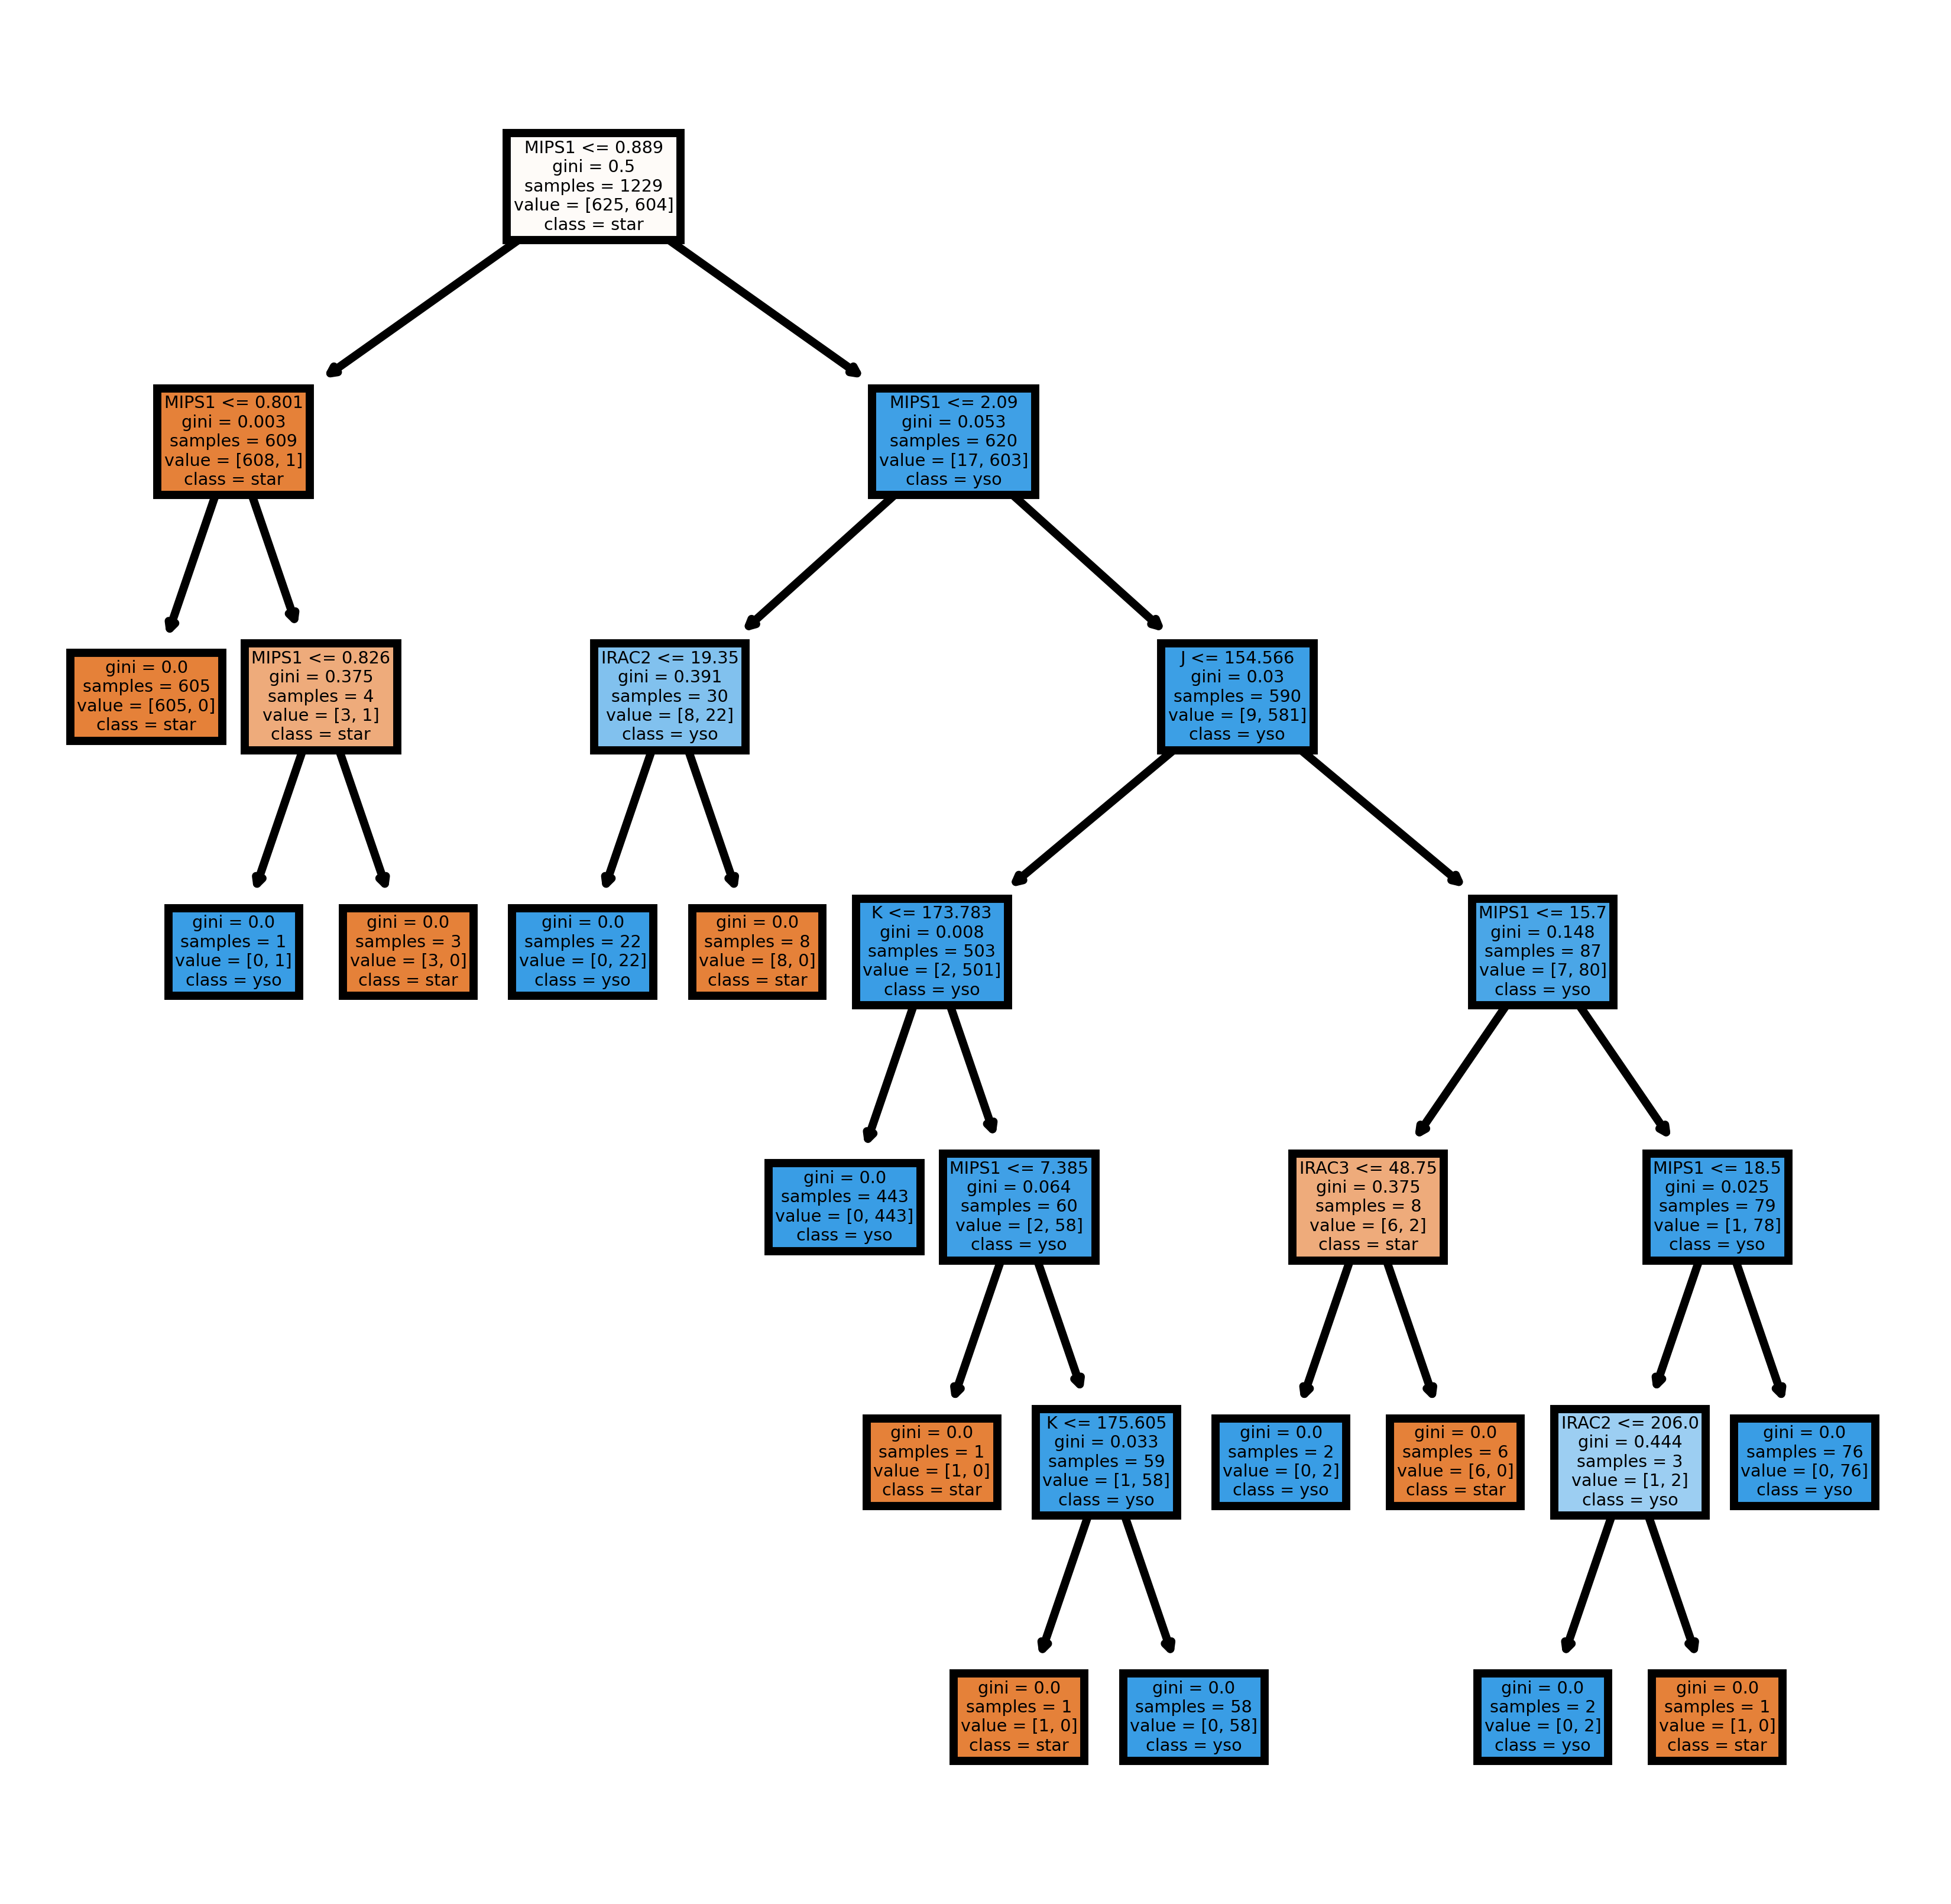

In [7]:
'''
Exercise 3
'''
############################################################################################################################
# Your code in this section:
tree_model = tree.DecisionTreeClassifier(max_depth=7)
tree_model.fit(x_train,y_train_flat)

feature_name = ['J', 'H', 'K', 'IRAC1', 'IRAC2', 'IRAC3', 'IRAC4', 'MIPS1']
classes = ['star','yso']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1000)
tree.plot_tree(tree_model, feature_names = feature_name, class_names = classes, filled=True)


print('Training Score: ', tree_model.score(x_train,y_train_flat))
print('Testing Score: ', tree_model.score(x_test, y_test_flat))









############################################################################################################################

# Artifial Neural Networks

* One of the simplest way to build a artificial neural network is using scikit-learn's MLP classifier.
      from sklearn.neural_network import MLPClassifier


* Build up a neural network model by:
      MLPClassifier()


* Some common parameters in multi-layer perceptron classifier: 
     * hidden_layer_sizes: How many hidden layers you want to add into a deep learning model.
     * activation:         Setting an activation function, like 'tanh', 'logistic', 'relu' 
     * solver:             Setting an optimizer, like 'adam', 'sgd'
     * max_iter:           Setting the number of training iterations.


* For a naive example, we have no need to use a deep learning model, so we won't use any hidden layer by setting hidden_layer_sizes=().


* Multi-Layer Perceptron Classifier trained with:
      model.fit(x_train, y_train)


* You can simply evaluate your model by:
      model.score()


* Print the score of training and testing.
* Reference:  [Muiti-Layer Perceptron Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [8]:
'''
Example 4
'''
# Setup a neuron network

iteration = 100 # In order to well trained your model, you need to give enough iterations times.
model = MLPClassifier(hidden_layer_sizes=(), activation='relu', max_iter=iteration, solver='sgd')

model.fit(x_train_ex, y_train_flat_ex)

# Evaluate model
print('Training Score: ', model.score(x_train_ex, y_train_flat_ex))
print('Testing Score: ', model.score(x_test_ex, y_test_flat_ex))

Training Score:  0.934092758340114
Testing Score:  0.9285714285714286


## Exercise 4
* Set up a MLP Classifier

* Fit data and Evaluate with testing data.

In [9]:
############################################################################################################################
# Your code in this section:

y_train_flat = []
for row in y_train:
    y_train_flat.append(np.argmax(row))
    
print(len(y_train_flat))

y_test_flat = []
for row in y_test:
    y_test_flat.append(np.argmax(row))

iteration = 1000
model = MLPClassifier(hidden_layer_sizes=(), activation='relu', max_iter=iteration, solver='sgd')

model.fit(x_train, y_train_flat)

# Evaluate model
print('Training Score: ', model.score(x_train, y_train_flat))
print('Testing Score: ', model.score(x_test, y_test_flat))







############################################################################################################################

1229
Training Score:  0.7697314890154597
Testing Score:  0.788961038961039
